A8: KNN

Sarah Kim

11/8/2022

In [159]:
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,\
recall_score, precision_score, f1_score, accuracy_score, make_scorer,\
precision_recall_fscore_support, mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split, cross_validate

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
from google.colab import drive

# Graphical Packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier


from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


#Task 1


##A

In [160]:
cd_df = pd.read_csv("https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/CD_additional_modified.csv")

##B

In [161]:
cd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4117 non-null   int64  
 1   job             4117 non-null   object 
 2   marital         4117 non-null   object 
 3   education       4117 non-null   object 
 4   default         4117 non-null   object 
 5   housing         4117 non-null   object 
 6   loan            4117 non-null   object 
 7   contact         4117 non-null   object 
 8   month           4117 non-null   object 
 9   day_of_week     4117 non-null   object 
 10  duration        4117 non-null   int64  
 11  campaign        4117 non-null   int64  
 12  pdays           4117 non-null   int64  
 13  previous        4117 non-null   int64  
 14  poutcome        4117 non-null   object 
 15  emp_var_rate    4117 non-null   float64
 16  cons_price_idx  4117 non-null   float64
 17  cons_conf_idx   4117 non-null   f

In [162]:
cd_df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,4117.000000,4117,4117,4117,4117,4117,4117,4117,4117,4117,...,4117.000000,4117.000000,4117.000000,4117,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117
unique,NaN,12,4,7,2,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,1012,2508,1264,3314,2175,3347,2650,1378,860,...,NaN,NaN,NaN,3522,NaN,NaN,NaN,NaN,NaN,3666
mean,40.115375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.537042,960.403449,0.190187,NaN,0.085742,93.580131,-40.500947,3.621904,5166.496502,NaN
std,10.314847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.568668,191.967524,0.541765,NaN,1.562799,0.579061,4.593445,1.733448,73.670942,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [163]:
cd_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


##C

In [164]:
# Extract and Categorize the Target Variable as a Single Column
y_target = cd_df.pop('y')


##C1

In [165]:
y_target = pd.get_dummies(y_target,drop_first=True)
cd_df['y_target'] = y_target

##D

In [166]:
cd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4117 non-null   int64  
 1   job             4117 non-null   object 
 2   marital         4117 non-null   object 
 3   education       4117 non-null   object 
 4   default         4117 non-null   object 
 5   housing         4117 non-null   object 
 6   loan            4117 non-null   object 
 7   contact         4117 non-null   object 
 8   month           4117 non-null   object 
 9   day_of_week     4117 non-null   object 
 10  duration        4117 non-null   int64  
 11  campaign        4117 non-null   int64  
 12  pdays           4117 non-null   int64  
 13  previous        4117 non-null   int64  
 14  poutcome        4117 non-null   object 
 15  emp_var_rate    4117 non-null   float64
 16  cons_price_idx  4117 non-null   float64
 17  cons_conf_idx   4117 non-null   f

In [167]:
cd_df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y_target
count,4117.000000,4117,4117,4117,4117,4117,4117,4117,4117,4117,...,4117.000000,4117.000000,4117.000000,4117,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000
unique,NaN,12,4,7,2,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1012,2508,1264,3314,2175,3347,2650,1378,860,...,NaN,NaN,NaN,3522,NaN,NaN,NaN,NaN,NaN,NaN
mean,40.115375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.537042,960.403449,0.190187,NaN,0.085742,93.580131,-40.500947,3.621904,5166.496502,0.109546
std,10.314847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.568668,191.967524,0.541765,NaN,1.562799,0.579061,4.593445,1.733448,73.670942,0.312361
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000


In [168]:
cd_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y_target
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


##E

In [169]:
X = pd.get_dummies(cd_df)
print(X.shape, y_target.shape)

(4117, 62) (4117, 1)


#Task 2

##1

In [170]:
# StandardScaler
pd.DataFrame(StandardScaler().fit_transform(X))

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,-0.980781,0.903544,-0.209099,0.201082,-0.351094,-1.206791,-1.186776,-1.240843,-1.332133,-0.914943,...,-0.130558,-0.125661,2.088223,-0.511966,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006
1,-0.108146,0.349992,0.569609,0.201082,-0.351094,0.649080,0.714811,0.892891,0.711441,0.332648,...,-0.130558,-0.125661,2.088223,-0.511966,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006
2,-1.465578,-0.117190,-0.598453,0.201082,-0.351094,0.841066,1.528296,-0.282840,0.773175,0.836300,...,-0.130558,-0.125661,-0.478876,-0.511966,-0.513855,-0.506292,2.045761,-0.351618,0.411021,-0.189006
3,-0.205106,-0.941629,0.180255,0.201082,-0.351094,0.841066,1.528296,-0.282840,0.771444,0.836300,...,-0.130558,-0.125661,2.088223,-0.511966,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006
4,0.667529,-0.780667,-0.598453,0.201082,-0.351094,-0.118867,-0.656542,-0.326386,0.328343,0.397810,...,-0.130558,-0.125661,-0.478876,1.953255,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4112,-0.980781,-0.800296,-0.598453,0.201082,-0.351094,0.841066,0.583548,-0.478795,0.770867,0.836300,...,-0.130558,-0.125661,-0.478876,-0.511966,1.946075,-0.506292,-0.488816,-0.351618,0.411021,-0.189006
4113,-0.108146,-0.148597,-0.598453,0.201082,-0.351094,0.841066,0.583548,-0.478795,0.771444,0.836300,...,-0.130558,-0.125661,2.088223,-0.511966,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006
4114,-1.271659,-0.757111,-0.209099,0.201082,1.494950,-1.206791,-1.186776,-1.240843,-1.308478,-0.914943,...,-0.130558,-0.125661,-0.478876,1.953255,-0.513855,-0.506292,-0.488816,2.843994,-2.432967,-0.189006
4115,1.734083,1.064506,-0.598453,0.201082,-0.351094,0.841066,-0.235119,0.958209,0.775483,0.836300,...,-0.130558,-0.125661,2.088223,-0.511966,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006


##2

In [171]:
X_random_columns_scaled = X.copy()

#now scale

# keep the column names since we will lose them
column_names = X_random_columns_scaled.columns

X_random_columns_scaled = StandardScaler().fit_transform(X_random_columns_scaled)
X_random_columns_scaled = pd.DataFrame(X_random_columns_scaled,columns = column_names )
print("\n",'scaled')
X_random_columns_scaled.head()


 scaled


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-0.980781,0.903544,-0.209099,0.201082,-0.351094,-1.206791,-1.186776,-1.240843,-1.332133,-0.914943,...,-0.130558,-0.125661,2.088223,-0.511966,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006
1,-0.108146,0.349992,0.569609,0.201082,-0.351094,0.649080,0.714811,0.892891,0.711441,0.332648,...,-0.130558,-0.125661,2.088223,-0.511966,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006
2,-1.465578,-0.117190,-0.598453,0.201082,-0.351094,0.841066,1.528296,-0.282840,0.773175,0.836300,...,-0.130558,-0.125661,-0.478876,-0.511966,-0.513855,-0.506292,2.045761,-0.351618,0.411021,-0.189006
3,-0.205106,-0.941629,0.180255,0.201082,-0.351094,0.841066,1.528296,-0.282840,0.771444,0.836300,...,-0.130558,-0.125661,2.088223,-0.511966,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006
4,0.667529,-0.780667,-0.598453,0.201082,-0.351094,-0.118867,-0.656542,-0.326386,0.328343,0.397810,...,-0.130558,-0.125661,-0.478876,1.953255,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006


#Task 3

##1

In [172]:
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
              'p' : [1,2]}

##2

In [173]:
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, scoring='f1', cv=3, return_train_score=True).fit(X_random_columns_scaled, y_target)


##3

In [174]:
result_df = pd.DataFrame(clf.cv_results_)
result_df[result_df['rank_test_score']==1]['mean_test_score']

1    0.620584
Name: mean_test_score, dtype: float64

#Task 4

##1

In [175]:
# Create dummies from categorical variables
category_columns_list = list(cd_df.select_dtypes(include='category').columns)
float_columns_list = list(cd_df.select_dtypes(include='float64').columns)

In [176]:
# Create a Pandas Dataframe that Summarizes the Hyperparameter Tuning Results
clf_df = pd.DataFrame(clf.cv_results_)
clf_df = clf_df.drop(columns=['mean_score_time','std_score_time','mean_fit_time','std_fit_time'])
print("Hyperparameter Search Grid Size: "+str(clf_df.shape))

Hyperparameter Search Grid Size: (20, 14)


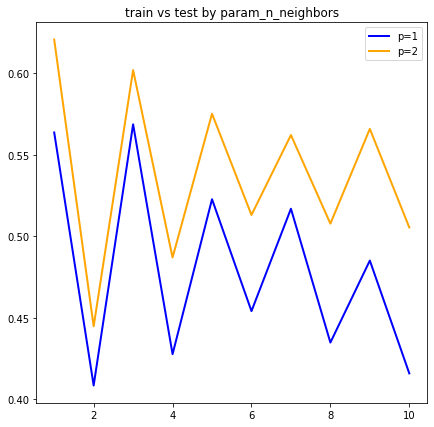

In [177]:
plt.figure(figsize=(7,7))
plt.plot('param_n_neighbors', 'mean_test_score', data=result_df[result_df['param_p']==1], marker='', color='blue', linewidth=2, label="p=1")
plt.plot('param_n_neighbors', 'mean_test_score', data=result_df[result_df['param_p']==2], marker='', color='orange', linewidth=2, label="p=2")


plt.legend()
plt.title("train vs test by param_n_neighbors")
plt.show()

##2

In [178]:
result_df[['param_n_neighbors','param_p','mean_test_score']].sort_values(by='mean_test_score',ascending=False).head(15)

,param_n_neighbors,param_p,mean_test_score
1,1,2,0.620584
5,3,2,0.601863
9,5,2,0.575081
4,3,1,0.568589
17,9,2,0.565790
0,1,1,0.563586
13,7,2,0.561998
8,5,1,0.522638
12,7,1,0.516793
11,6,2,0.512997


##3

In [179]:
# Show the Top 5 Cross-Validation Models with their Hyperparameter Choices
clf_df.sort_values('mean_test_score',ascending=False).head(5)

,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
1,1,2,"{'n_neighbors': 1, 'p': 2}",0.580913,0.614173,0.666667,0.620584,0.035301,1,1.000000,1.000000,1.000000,1.000000,0.000000
5,3,2,"{'n_neighbors': 3, 'p': 2}",0.572687,0.599156,0.633745,0.601863,0.025000,2,0.806084,0.818692,0.814532,0.813102,0.005245
9,5,2,"{'n_neighbors': 5, 'p': 2}",0.537037,0.549550,0.638655,0.575081,0.045243,3,0.731405,0.750000,0.735772,0.739059,0.007939
4,3,1,"{'n_neighbors': 3, 'p': 1}",0.556054,0.511416,0.638298,0.568589,0.052552,4,0.776892,0.746988,0.781746,0.768542,0.015369
17,9,2,"{'n_neighbors': 9, 'p': 2}",0.509434,0.538813,0.649123,0.565790,0.060134,5,0.649237,0.612975,0.631111,0.631108,0.014804


The top 5 nearest neighbor values that achieved the best results are #1 with mean_test_score of 0.620584	, #5 mean_test_score of 0.601863, #9 mean_test_score of 0.575081, #4 with 0.568589, and #17 with 0.565790. We can observe that the mean test scores are relatively similar, and have slight variation.  

In [180]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [181]:
%%shell
jupyter nbconvert --to html '/content/gdrive/MyDrive/A8_Kim_Sarah.ipynb'

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/A8_Kim_Sarah.ipynb to html
[NbConvertApp] Writing 352535 bytes to /content/gdrive/MyDrive/A8_Kim_Sarah.html
